C:\Users\rouna\AppData\Local\Temp\ipykernel_35780\2493815403.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(['{:,.0f}'.format(x) for x in current_speed_ticks])
C:\Users\rouna\AppData\Local\Temp\ipykernel_35780\2493815403.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['{:,.0f}'.format(x) for x in current_dist_ticks])


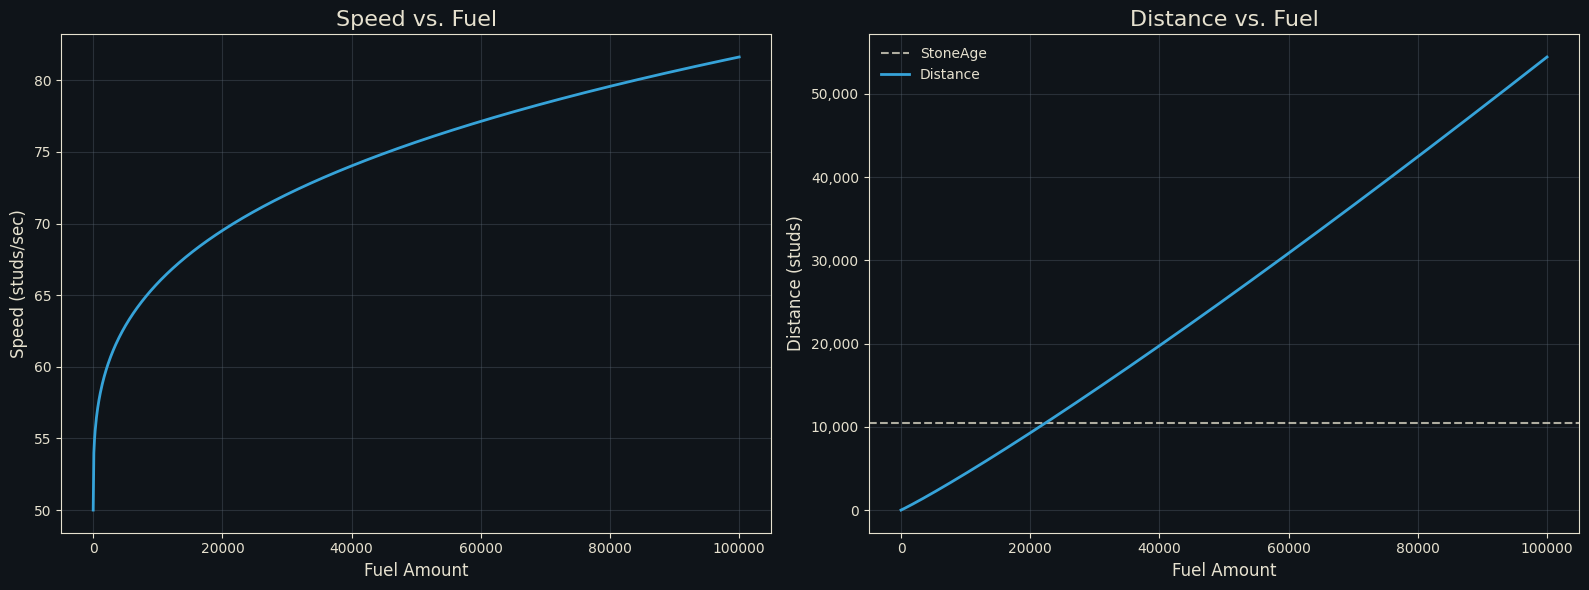

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import matplotx

# Apply the requested style
plt.style.use(matplotx.styles.ayu['dark'])

# --- Configuration ---
BASE_SPEED = 50
WORLD_EFFICIENCY_MAIN = 1
FUEL_CONSUMPTION_RATE_MAIN = 150
MULTIPLIERS = 1

def calculate_speed_from_fuel(fuel, world_efficiency=1):
    # Using 0.3 matching your snippet (Note: Stats.luau uses 0.7)
    fuel_component = np.power(fuel, 0.3) * world_efficiency
    total_speed = (BASE_SPEED + fuel_component) * MULTIPLIERS
    return total_speed

def calculate_distance_from_fuel(fuel):
    speed = calculate_speed_from_fuel(fuel, WORLD_EFFICIENCY_MAIN)
    time_left = fuel / FUEL_CONSUMPTION_RATE_MAIN
    total_distance = speed * time_left
    return total_distance

# --- Data Generation ---
fuel_values = np.linspace(0, 100000, 1000) 
speed_values = calculate_speed_from_fuel(fuel_values)
distance_values = calculate_distance_from_fuel(fuel_values)

# --- Plotting ---
# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# === Subplot 1: Speed vs Fuel ===
ax1.plot(fuel_values, speed_values, label='Speed', linewidth=2)
ax1.set_title('Speed vs. Fuel', fontsize=16)
ax1.set_xlabel('Fuel Amount', fontsize=12)
ax1.set_ylabel('Speed (studs/sec)', fontsize=12)
ax1.grid(True, alpha=0.35)

# Format Speed Y-axis
current_speed_ticks = ax1.get_yticks()
ax1.set_yticklabels(['{:,.0f}'.format(x) for x in current_speed_ticks])

# === Subplot 2: Distance vs Fuel ===
worlds = {
    "StoneAge" : 10510,
}

for name, val in worlds.items():
    ax2.axhline(y=val, label=name, alpha=0.75, linestyle='dashed')

ax2.plot(fuel_values, distance_values, label='Distance', linewidth=2)
ax2.set_title('Distance vs. Fuel', fontsize=16)
ax2.set_xlabel('Fuel Amount', fontsize=12)
ax2.set_ylabel('Distance (studs)', fontsize=12)
ax2.grid(True, alpha=0.35)

# Format Distance Y-axis
current_dist_ticks = ax2.get_yticks()
ax2.set_yticklabels(['{:,.0f}'.format(x) for x in current_dist_ticks])

# Add legend to the second plot (contains world info)
ax2.legend()

plt.tight_layout()
plt.show()